# Mass Regression With Background

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import atlas_mpl_style as ampl
ampl.use_atlas_style()

In [2]:
ampl.use_atlas_style()

This is a glitch. For some reason matplotlib needs to show a plot before the global rcParams are applied...

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Tex Gyre Heros, Helvetica, Nimbus Sans, FreeSans, Arial


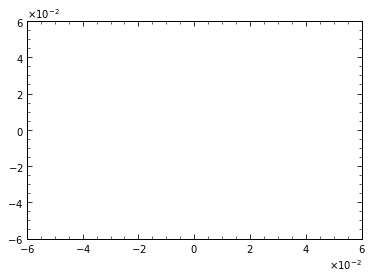

In [3]:
plt.plot()
plt.show()

In [4]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10, 8)
matplotlib.rcParams['xtick.labelsize'] = 16
matplotlib.rcParams['ytick.labelsize'] = 16
matplotlib.rcParams['legend.fontsize'] = 16

## Add Background(s)

In [5]:
InDir = '/fast_scratch_1/atlas/hh4b/background/dijet_bkgd/'

In [6]:
X_all = np.load(InDir+'X_all.npy')
Y_all = np.load(InDir+'Y_all.npy')
MC_all = np.load(InDir+'MC_all.npy')

X_alld = np.load(InDir+'X_alld.npy')
Y_alld = np.load(InDir+'Y_alld.npy')

print('X shape: {}'.format(X_all.shape))
print('X downsampled shape: {}'.format(X_alld.shape))
print('Sum of mcEventWeights: {}'.format(np.sum(MC_all)))

X shape: (317846, 40)
X downsampled shape: (317846, 40)
Sum of mcEventWeights: 34748.38946397555


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Tex Gyre Heros, Helvetica, Nimbus Sans, FreeSans, Arial


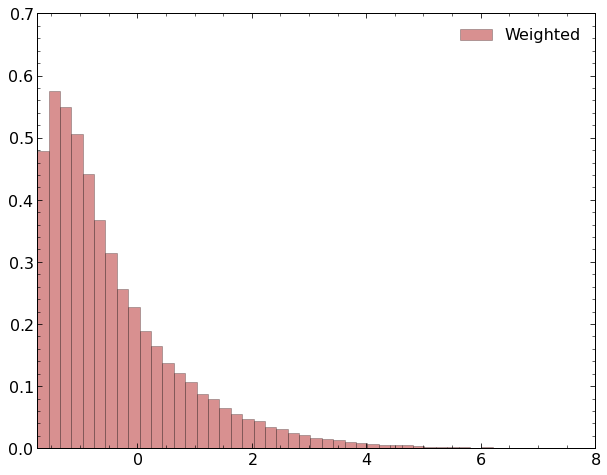

In [7]:
ptbins = np.linspace(-1.75, 8, 50, endpoint=True)
# plt.hist(X_alld[:,1], bins=ptbins, density=True, edgecolor='black',
#          alpha=.5, color='dodgerblue', label='Downsampled')
plt.hist(X_all[:,4], bins=ptbins, density=True, edgecolor='black',
         weights=MC_all, alpha=.5, color='firebrick', label='Weighted')
plt.xlim(ptbins[0], ptbins[-1])
plt.legend()
# plt.savefig('leadjet_pt_dist_bkgd_normal_selection.png')
plt.show()

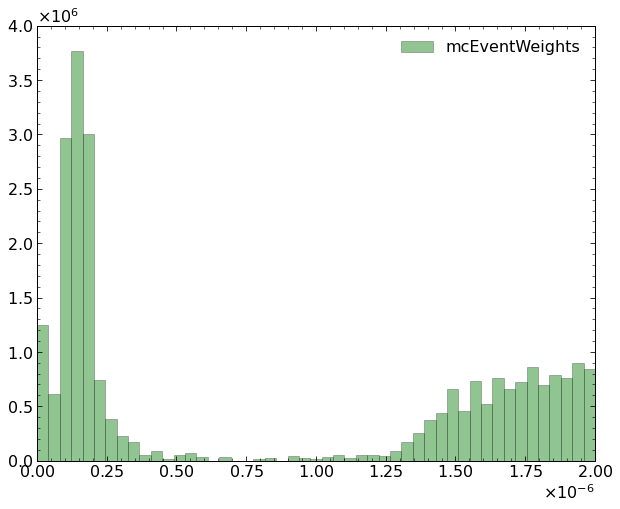

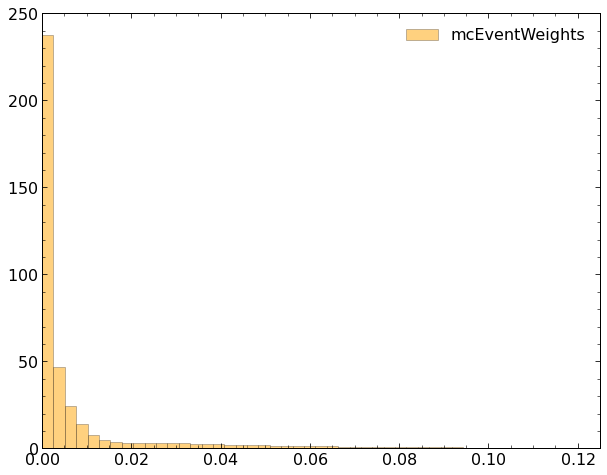

In [8]:
mcbins = np.linspace(0,2e-6,50,endpoint=True)
plt.hist(MC_all, bins=mcbins, density=True, alpha=.5, edgecolor='black',
        color='forestgreen', label='mcEventWeights')
plt.xlim(mcbins[0], mcbins[-1])
plt.legend()
plt.show()

MC_norm = MC_all / np.max(MC_all)
mcnorm_bins = np.linspace(0,.125,50,endpoint=True)
plt.hist(MC_norm, bins=mcnorm_bins, density=True, alpha=.5, edgecolor='black',
        color='orange', label='mcEventWeights')
plt.xlim(mcnorm_bins[0], mcnorm_bins[-1])
plt.legend()
plt.show()

In [9]:
NDS = 46794 + 150122 + 84705 + 26609 + 8380 + 1122 + 114 + 8
X_full = np.load(InDir+'X_allf.npy')
Y_full = np.load(InDir+'Y_allf.npy')
MC_full = np.load(InDir+'MC_allf.npy')
mcf_prob = MC_full/np.sum(MC_full)

print('Total Number: {}'.format(X_full.shape[0]))
print('Number to downsample: {}'.format(NDS))

Total Number: 3944898
Number to downsample: 317854


In [10]:
chosen_ones = np.random.choice(X_full[:,1], size=(NDS,),
                               replace=True, p=mcf_prob)

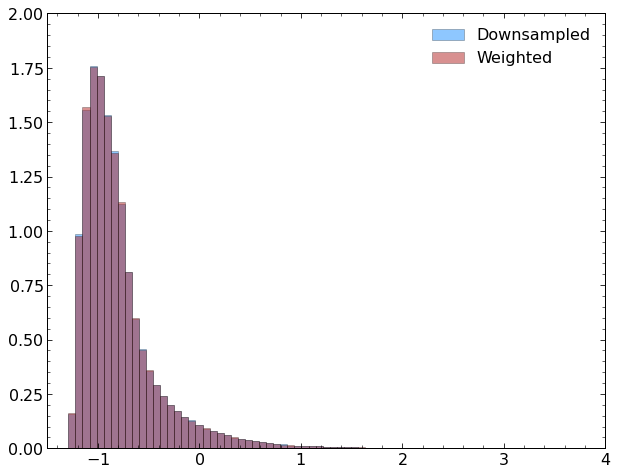

In [11]:
ptbins = np.linspace(-1.5, 4, 80, endpoint=True)
plt.hist(chosen_ones, bins=ptbins, density=True, edgecolor='black',
         alpha=.5, color='dodgerblue', label='Downsampled')
plt.hist(X_all[:,1], bins=ptbins, density=True, edgecolor='black',
         weights=MC_all, alpha=.5, color='firebrick', label='Weighted')
plt.xlim(ptbins[0], ptbins[-1])
plt.legend()
# plt.savefig('leadjet_pt_dist_bkgd_NDS_selection_replacement.png')
plt.show()

## Add Signal

In [12]:
InDir_nonres = '/fast_scratch_1/atlas/hh4b/signal/nonresonant_vbf_pythia/'

In [13]:
x_signal_str = 'signal-nonresonant_vbf_pythia.502971._1_X.npy'
y_signal_str = 'signal-nonresonant_vbf_pythia.502971._1_Y.npy'
mc_signal_str = 'signal-nonresonant_vbf_pythia.502971._1_mc.npy'
X_sig = np.load(InDir_nonres+x_signal_str)
Y_sig = np.load(InDir_nonres+y_signal_str)
MC_sig = np.load(InDir_nonres+mc_signal_str)
print(X_sig.shape)
print(Y_sig.shape)
print(MC_sig.shape)

(68636, 40)
(68636, 2)
(68636,)


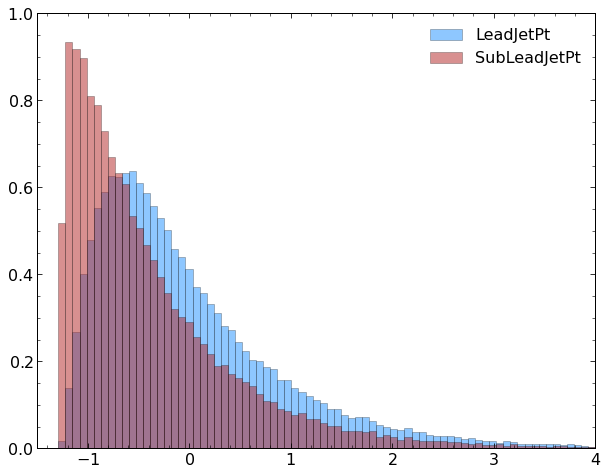

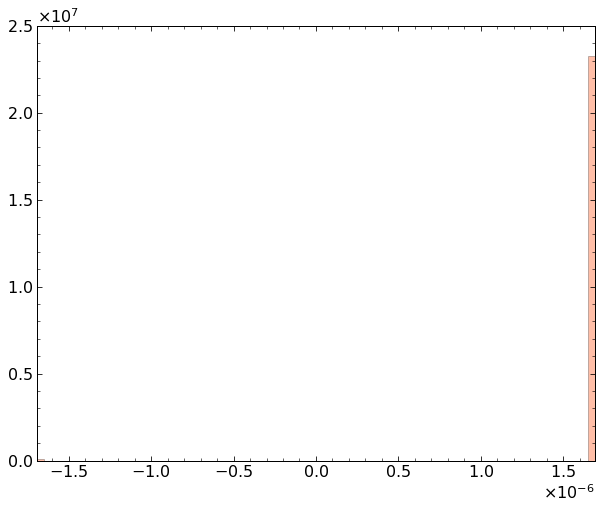

min mc sig: -1.6922986105782911e-06
max mc sig: 1.6922986105782911e-06


In [14]:
## Without Weights
# plt.cla(); plt.clf()
# ptbins = np.linspace(-1.5, 4, 80, endpoint=True)
# plt.hist(X_sig[:,1], bins=ptbins, density=True, edgecolor='black',
#          alpha=.5, color='dodgerblue', label='LeadJetPt')
# plt.hist(X_sig[:,21], bins=ptbins, density=True, edgecolor='black',
#          alpha=.5, color='firebrick', label='SubLeadJetPt')
# plt.xlim(ptbins[0], ptbins[-1])
# plt.legend()
# # plt.savefig('signal.png')
# plt.show()

## With Weights
ptbins = np.linspace(-1.5, 4, 80, endpoint=True)
plt.hist(X_sig[:,1], bins=ptbins, density=True, edgecolor='black',
         alpha=.5, color='dodgerblue', label='LeadJetPt', weights=MC_sig)
plt.hist(X_sig[:,21], bins=ptbins, density=True, edgecolor='black',
         alpha=.5, color='firebrick', label='SubLeadJetPt', weights=MC_sig)
plt.xlim(ptbins[0], ptbins[-1])
plt.legend()
# plt.savefig('signal.png')
plt.show()

## With Weights
if not np.all(MC_sig == MC_sig[0]):
    mcsig_min = np.min(MC_sig)
    mcsig_max = np.max(MC_sig)
    mcsig_bins = np.linspace(mcsig_min, mcsig_max, 80, endpoint=True)
    sig_weight_bins = np.linspace(-1.5, 4, 80, endpoint=True)
    plt.hist(MC_sig, bins=mcsig_bins, density=True, edgecolor='black',
             alpha=.5, color='coral')
    plt.xlim(mcsig_min, mcsig_max)
    # plt.savefig('signal.png')
    plt.show()
    print('min mc sig: {}'.format(mcsig_min))
    print('max mc sig: {}'.format(mcsig_max))
else:
    print('\nAll weights in MC_sig are the same!\n')

## Import Model and Train Network

### Model

In [15]:
import os, sys
cwd = os.getcwd()
path_head, path_tail = os.path.split(cwd)
sys.path.append(path_head+'/utils')
from ml_mass_regression_models import DNN_wDropout
from ml_utils import tvt_num
import tensorflow as tf
from tensorflow import keras

os.environ['CUDA_VISIBLE_DEVICES'] = "1"
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

In [16]:
DNN_WDO = DNN_wDropout(num_features=X_sig.shape[1],
            name='mass_regression_dnn')
DNN_WDO.compile(loss='mse', optimizer=keras.optimizers.Adam(
            learning_rate=.002))
DNN_WDO.summary()

Model: "mass_regression_dnn"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 40)]              0         
_________________________________________________________________
dense_0 (Dense)              (None, 100)               4100      
_________________________________________________________________
activation_0 (Activation)    (None, 100)               0         
_________________________________________________________________
dropout_0 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
activation_1 (Activation)    (None, 100)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)       

2023-02-08 09:25:27.786323: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
2023-02-08 09:25:27.786396: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 378 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:1b:00.0, compute capability: 7.5


### Split Data

In [17]:
NTrain, NVal, NTest = tvt_num(Y_sig, (70,15,15))

X_sig_tr = X_sig[:NTrain,:]
X_sig_val = X_sig[NTrain:NVal+NTrain,:]
X_sig_test = X_sig[NVal+NTrain:,:]
MC_sig_test = MC_sig[NVal+NTrain:]

Y_sig_tr = Y_sig[:NTrain,:]
Y_sig_val = Y_sig[NTrain:NVal+NTrain,:]
Y_sig_test = Y_sig[NVal+NTrain:,:]

print('*'+'-'*28+'*')
print('  -- TRAINING STATISTICS --')
print('-'*30)
print('Training   :  {}'.format(NTrain))
print('Validation :  {}'.format(NVal))
print('Testing    :  {}'.format(NTest))
print('*'+'-'*28+'*')

*----------------------------*
  -- TRAINING STATISTICS --
------------------------------
Training   :  48045
Validation :  10295
Testing    :  10296
*----------------------------*


In [18]:
history = DNN_WDO.fit(
                X_sig_tr,
                Y_sig_tr,
                validation_data=(X_sig_val, Y_sig_val),
                shuffle=True,
                epochs=100,
                batch_size=10000)

2023-02-08 09:25:28.890840: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
5/5 [==============================] - 2s 49ms/step - loss: 0.2230 - val_loss: 0.1238
Epoch 2/100
5/5 [==============================] - 0s 19ms/step - loss: 0.0926 - val_loss: 0.0395
Epoch 3/100
5/5 [==============================] - 0s 13ms/step - loss: 0.0526 - val_loss: 0.0423
Epoch 4/100
5/5 [==============================] - 0s 12ms/step - loss: 0.0497 - val_loss: 0.0348
Epoch 5/100
5/5 [==============================] - 0s 17ms/step - loss: 0.0392 - val_loss: 0.0292
Epoch 6/100
5/5 [==============================] - 0s 16ms/step - loss: 0.0337 - val_loss: 0.0272
Epoch 7/100
5/5 [==============================] - 0s 19ms/step - loss: 0.0316 - val_loss: 0.0248
Epoch 8/100
5/5 [==============================] - 0s 12ms/step - loss: 0.0290 - val_loss: 0.0221
Epoch 9/100
5/5 [==============================] - 0s 15ms/step - loss: 0.0270 - val_loss: 0.0209
Epoch 10/100
5/5 [==============================] - 0s 17ms/step - loss: 0.0260 - val_loss: 0.0201
Epoch 11/100
5/5 [=

### View History

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Tex Gyre Heros, Helvetica, Nimbus Sans, FreeSans, Arial


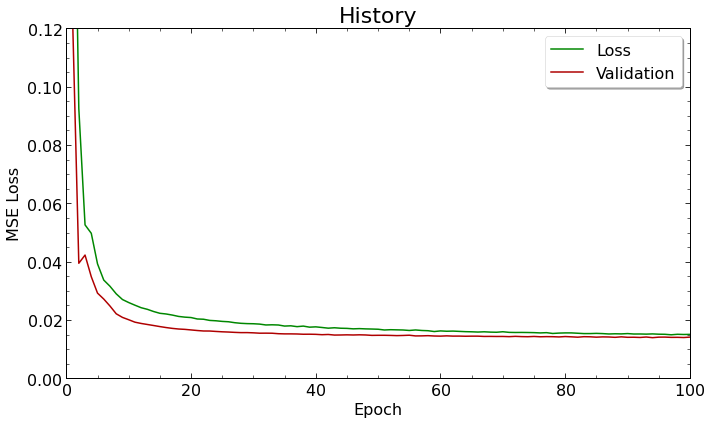

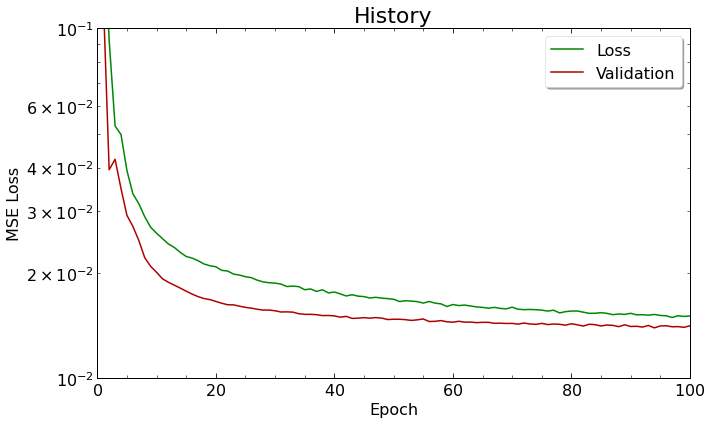

In [19]:
x_axis_range = range(1,101)
history = DNN_WDO.history
plt.plot(x_axis_range, history.history['loss'], label='Loss')
plt.plot(x_axis_range, history.history['val_loss'], label='Validation')
plt.title('History', fontsize=22)
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('MSE Loss', fontsize=16)
plt.xlim(0, x_axis_range[-1])
plt.ylim(0,.12)
fig = plt.gcf()
fig.set_size_inches(10,6)
plt.tight_layout()
plt.legend(frameon=True, fancybox=True, shadow=True)
# plt.savefig('Plots/Presentation_Feb23/DNN_History.png')
plt.show()

#==========================================================
x_axis_range = range(1,101)
history = DNN_WDO.history
plt.plot(x_axis_range, history.history['loss'], label='Loss')
plt.plot(x_axis_range, history.history['val_loss'], label='Validation')
plt.title('History', fontsize=22)
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('MSE Loss', fontsize=16)
plt.xlim(0, x_axis_range[-1])
plt.ylim(.01,.1)
plt.semilogy()
fig = plt.gcf()
fig.set_size_inches(10,6)
plt.tight_layout()
plt.legend(frameon=True, fancybox=True, shadow=True)
# plt.savefig('Plots/Presentation_Feb23/DNN_History_semilogy.png')
plt.show()

## Add Backgrounds and Evaluate

In [20]:
### Combine Different Backgrounds Here

In [21]:
## Previous method
# X_dijet = X_all
# MC_dijet = MC_all / np.sum(MC_all)

## New Method
InDir_bkgd = '/fast_scratch_1/atlas/hh4b/background/dijet_bkgd/'
X_dijet = np.load(InDir_bkgd+'X_allf.npy')
MC_dijet = np.load(InDir_bkgd+'MC_allf.npy')

# remember we need to take only the training fraction
N_tr_bkgd = round(.15*X_dijet.shape[0])
print('Number of backgrounds: {}'.format(X_dijet.shape[0]))
print('Number taken for training: {}'.format(N_tr_bkgd))

X_dijet_ev = X_dijet[:N_tr_bkgd,]
MC_dijet_ev = MC_dijet[:N_tr_bkgd]

print('Evaluation arrays:')
print(X_dijet_ev.shape, MC_dijet_ev.shape)

Number of backgrounds: 3944898
Number taken for training: 591735
Evaluation arrays:
(591735, 40) (591735,)


### Evaluate

In [22]:
predictions_sig = DNN_WDO.predict(
                    X_sig_test,
                    batch_size=10000)
predictions_bkgd = DNN_WDO.predict(
                    X_dijet_ev,
                    batch_size=10000)

## Rebuild Mass from Normalization
Values are hard coded for mass normalization at 110.5, 27.06 for mean and standard deviation respectively

In [23]:
m_mean = 110.5
m_std = 27.06
LJM_dijet_nn = predictions_bkgd[:,0] * m_std + m_mean
SLJM_dijet_nn = predictions_bkgd[:,1] * m_std + m_mean
LJM_dijet_reco = X_dijet[:,0] * m_std + m_mean
SLJM_dijet_reco = X_dijet[:,20] * m_std + m_mean

LJM_sig_nn = predictions_sig[:,0] * m_std + m_mean
SLJM_sig_nn = predictions_sig[:,1] * m_std + m_mean
LJM_sig_reco = X_sig[:,0] * m_std + m_mean
SLJM_sig_reco = X_sig[:,20] * m_std + m_mean

# Old Method:
# signal_weights_full = np.full(LJM_sig_reco.shape, 1./LJM_sig_reco.shape[0])
# signal_weights_test = np.full(LJM_sig_nn.shape, 1./LJM_sig_nn.shape[0])

# Old Method:
# adj_weight_mc_dijet = MC_dijet * MC_dijet.shape[0]
# adj_weight_mc_sig_test = signal_weights_test * signal_weights_test.shape[0]
# adj_weight_mc_sig_full = signal_weights_full * signal_weights_full.shape[0]

## CREATE SUBSETS FOR ZOOMED IN PLOTS
# 0) Create range
subset_range = np.linspace(110, 120, num=80, endpoint=True)

# 1) create boolean mask for subsets
LJM_dijet_nn_ss_b = np.logical_and(LJM_dijet_nn >= 110.0, LJM_dijet_nn <= 120.0)
LJM_sig_nn_ss_b = np.logical_and(LJM_sig_nn >= 110.0, LJM_sig_nn <= 120.0)
LJM_dijet_reco_ss_b = np.logical_and(LJM_dijet_reco >= 110.0, LJM_dijet_reco <= 120.0)
LJM_sig_reco_ss_b = np.logical_and(LJM_sig_reco >= 110.0, LJM_sig_reco <= 120.0)

# 2) slice down the sub-sets
# 2.1) neural nets 
LJM_dijet_nn_ss = LJM_dijet_nn[LJM_dijet_nn_ss_b]
MC_dijet_ev_ss = MC_dijet_ev[LJM_dijet_nn_ss_b]
LJM_sig_nn_ss = LJM_sig_nn[LJM_sig_nn_ss_b]
MC_sig_test_ss = MC_sig_test[LJM_sig_nn_ss_b]

# 2.2) reconstructed
LJM_dijet_reco_ss = LJM_dijet_reco[LJM_dijet_reco_ss_b]
MC_dijet_ss = MC_dijet[LJM_dijet_reco_ss_b]
LJM_sig_reco_ss = LJM_sig_reco[LJM_sig_reco_ss_b]
MC_sig_ss = MC_sig[LJM_sig_reco_ss_b]

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Tex Gyre Heros, Helvetica, Nimbus Sans, FreeSans, Arial
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Tex Gyre Heros, Helvetica, Nimbus Sans, FreeSans, Arial
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Tex Gyre Heros, Helvetica, Nimbus Sans, FreeSans, Arial


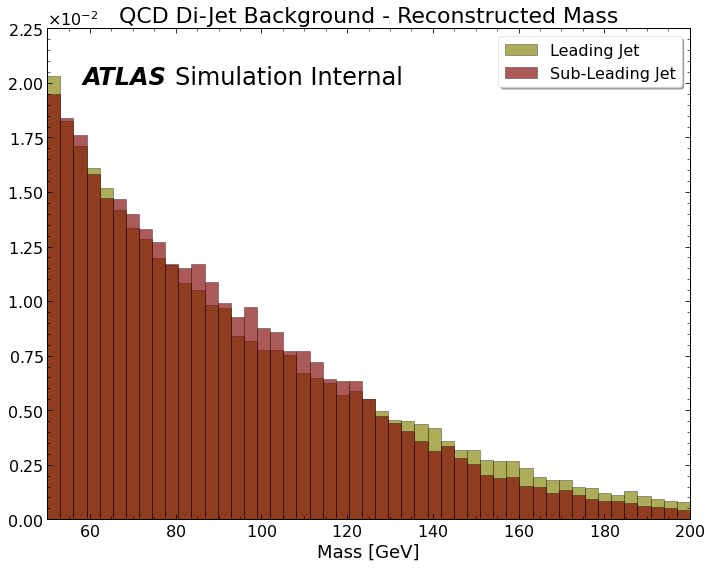

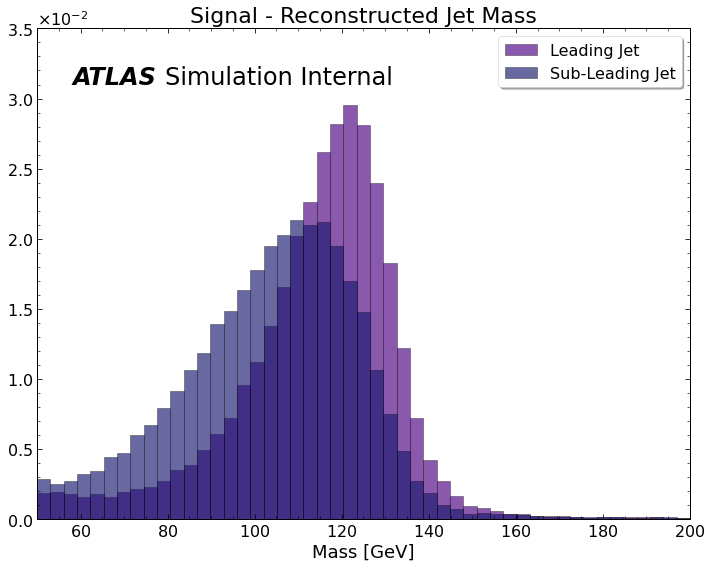

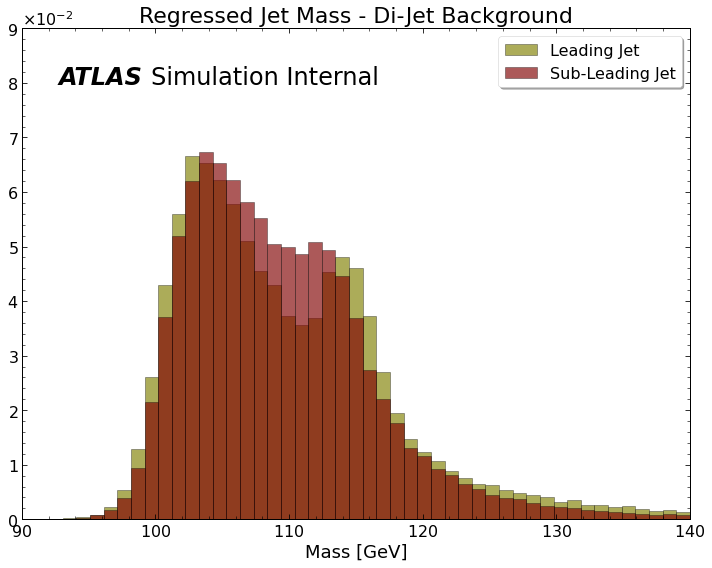

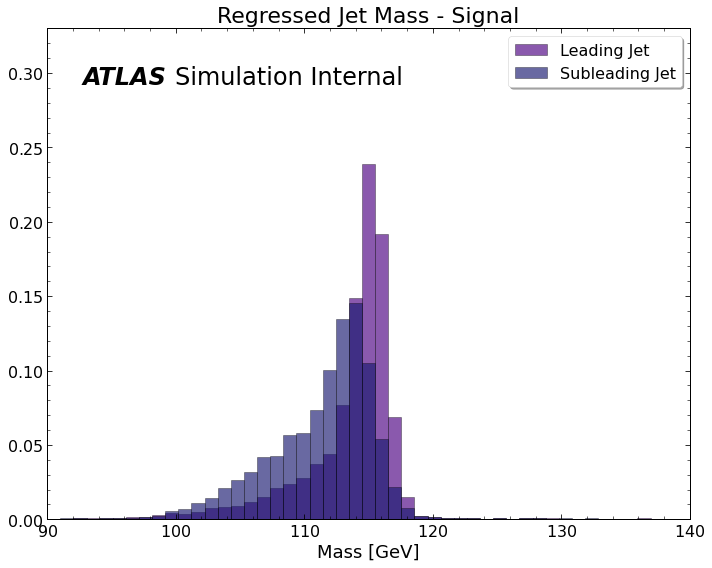

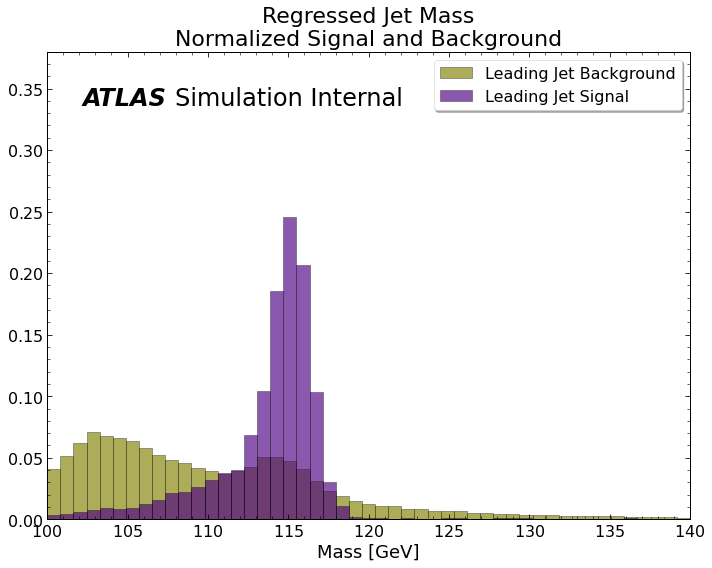

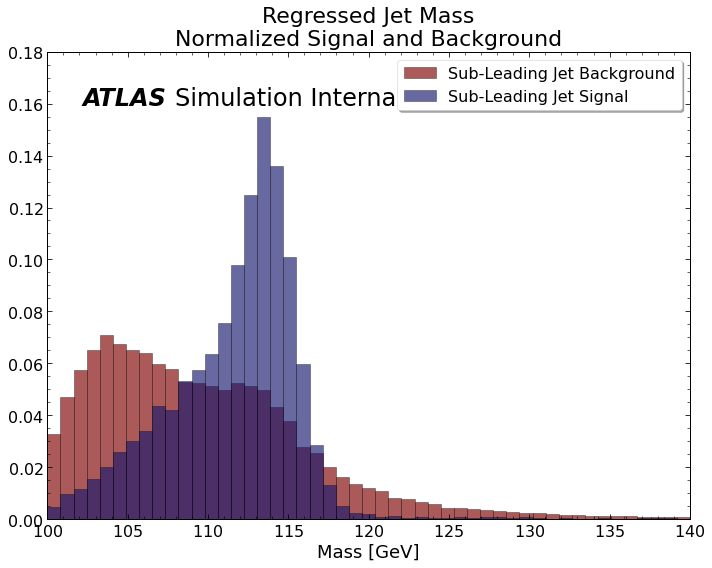

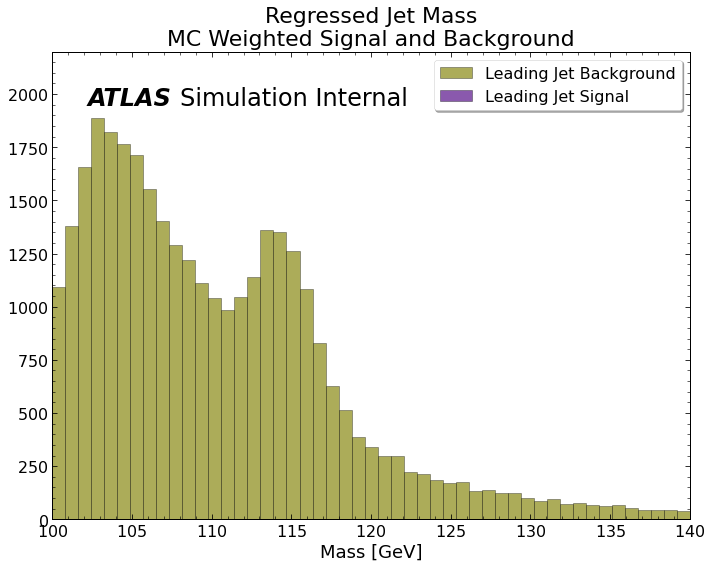

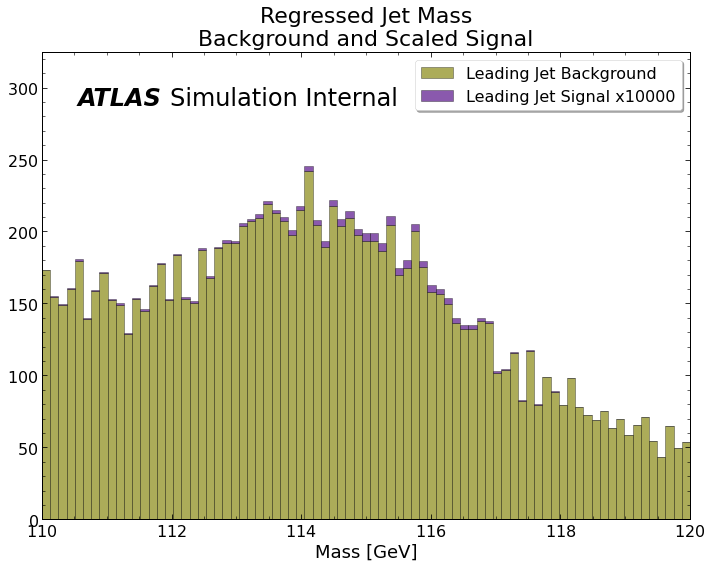

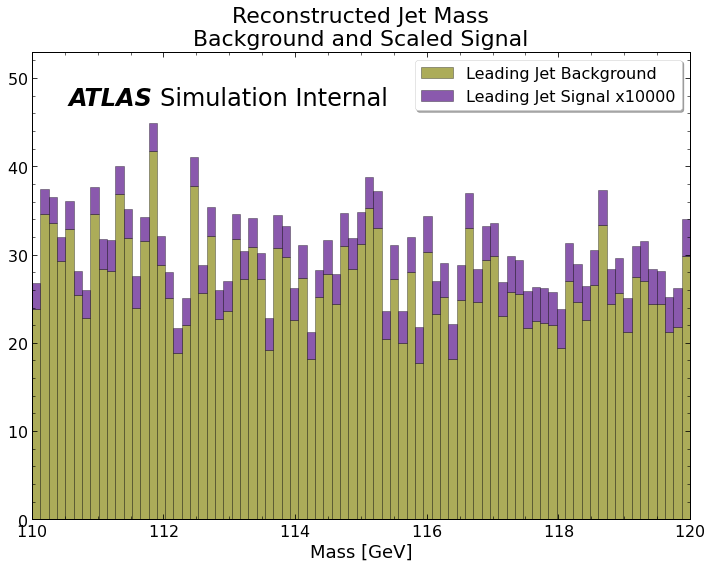

In [24]:
mass_bins_h = np.linspace(50, 200, num=50, endpoint=True)
mass_bins_h2 = np.linspace(100, 140, num=50, endpoint=True)
mass_bins_h3 = np.linspace(90, 140, num=50, endpoint=True)
    

plt.hist(LJM_dijet_reco, bins=mass_bins_h, weights=MC_dijet,
        density=True, alpha=.65, edgecolor='black', label='Leading Jet',
        color='olive')
plt.hist(SLJM_dijet_reco, bins=mass_bins_h, weights=MC_dijet,
        density=True, alpha=.65, edgecolor='black', label='Sub-Leading Jet',
        color='maroon')
plt.title('QCD Di-Jet Background - Reconstructed Mass', fontsize=22)
plt.xlabel('Mass [GeV]', fontsize=18)
ampl.plot.draw_atlas_label(x=.055, y=.925, ax=plt.gca(), status='int',
                           simulation=True, color='black', fontsize=24)
plt.xlim(mass_bins_h[0], mass_bins_h[-1])
plt.legend(frameon=True, fancybox=True, shadow=True)
fig = plt.gcf()
fig.patch.set_facecolor('white')
fig.patch.set_alpha(1.0)
plt.tight_layout()
plt.savefig('Plots/Presentation_Feb23/jet_mass_reco_dijet_bkgd.png')
plt.show()


## Input reconstructed only here!
plt.hist(LJM_sig_reco, bins=mass_bins_h, weights=None,
        density=True, alpha=.65, edgecolor='black', label='Leading Jet',
        color='indigo')
plt.hist(SLJM_sig_reco, bins=mass_bins_h, weights=None,
        density=True, alpha=.65, edgecolor='black', label='Sub-Leading Jet',
        color='midnightblue')
plt.title('Signal - Reconstructed Jet Mass', fontsize=22)
plt.xlabel('Mass [GeV]', fontsize=18)
ampl.plot.draw_atlas_label(x=.055, y=.925, ax=plt.gca(), status='int',
                           simulation=True, color='black', fontsize=24)
plt.xlim(mass_bins_h[0], mass_bins_h[-1])
plt.legend(frameon=True, fancybox=True, shadow=True)
fig = plt.gcf()
fig.patch.set_facecolor('white')
fig.patch.set_alpha(1.0)
plt.tight_layout()
plt.savefig('Plots/Presentation_Feb23/jet_mass_reco_signal.png')
plt.show()


plt.hist(LJM_dijet_nn, bins=mass_bins_h3, weights=MC_dijet_ev,
        density=True, alpha=.65, edgecolor='black', label='Leading Jet',
        color='olive')
plt.hist(SLJM_dijet_nn, bins=mass_bins_h3, weights=MC_dijet_ev,
        density=True, alpha=.65, edgecolor='black', label='Sub-Leading Jet',
        color='maroon')
plt.title('Regressed Jet Mass - Di-Jet Background', fontsize=22)
plt.xlabel('Mass [GeV]', fontsize=18)
ampl.plot.draw_atlas_label(x=.055, y=.925, ax=plt.gca(), status='int',
                           simulation=True, color='black', fontsize=24)
plt.xlim(mass_bins_h3[0], mass_bins_h3[-1])
plt.ylim(0,.09)
plt.legend(frameon=True, fancybox=True, shadow=True)
fig = plt.gcf()
fig.patch.set_facecolor('white')
fig.patch.set_alpha(1.0)
plt.tight_layout()
plt.savefig('Plots/Presentation_Feb23/jet_mass_nn_dijet_bkgd.png')
plt.show()


plt.hist(LJM_sig_nn, bins=mass_bins_h3, density=True,
        alpha=.65, edgecolor='black', label='Leading Jet',
        color='indigo')
plt.hist(SLJM_sig_nn, bins=mass_bins_h3, density=True,
        alpha=.65, edgecolor='black', label='Subleading Jet',
        color='midnightblue')
plt.title('Regressed Jet Mass - Signal', fontsize=22)
plt.xlabel('Mass [GeV]', fontsize=18)
ampl.plot.draw_atlas_label(x=.055, y=.925, ax=plt.gca(), status='int',
                           simulation=True, color='black', fontsize=24)
plt.xlim(mass_bins_h3[0], mass_bins_h3[-1])
plt.ylim(0,.33)
plt.legend(frameon=True, fancybox=True, shadow=True)
fig = plt.gcf()
fig.patch.set_facecolor('white')
fig.patch.set_alpha(1.0)
plt.tight_layout()
plt.savefig('Plots/Presentation_Feb23/jet_mass_nn_signal.png')
plt.show()


plt.hist(LJM_dijet_nn, bins=mass_bins_h2, density=True, weights=MC_dijet_ev,
        alpha=.65, edgecolor='black', color='olive', label='Leading Jet Background')
plt.hist(LJM_sig_nn, bins=mass_bins_h2, density=True,
        alpha=.65, edgecolor='black', color='indigo', label='Leading Jet Signal')
plt.title('Regressed Jet Mass\nNormalized Signal and Background', fontsize=22)
plt.xlabel('Mass [GeV]', fontsize=18)
ampl.plot.draw_atlas_label(x=.055, y=.925, ax=plt.gca(), status='int',
                           simulation=True, color='black', fontsize=24)
plt.xlim(mass_bins_h2[0], mass_bins_h2[-1])
plt.ylim(0,.38)
plt.legend(frameon=True, fancybox=True, shadow=True)
fig = plt.gcf()
fig.patch.set_facecolor('white')
fig.patch.set_alpha(1.0)
plt.tight_layout()
plt.savefig('Plots/Presentation_Feb23/jet_mass_nn_sig_bkgd_lj_norm.png')
plt.show()


plt.hist(SLJM_dijet_nn, bins=mass_bins_h2, density=True, weights=MC_dijet_ev,
        alpha=.65, edgecolor='black', color='maroon', label='Sub-Leading Jet Background')
plt.hist(SLJM_sig_nn, bins=mass_bins_h2, density=True,
        alpha=.65, edgecolor='black', color='midnightblue', label='Sub-Leading Jet Signal')
plt.title('Regressed Jet Mass\nNormalized Signal and Background', fontsize=22)
plt.xlabel('Mass [GeV]', fontsize=18)
ampl.plot.draw_atlas_label(x=.055, y=.925, ax=plt.gca(), status='int',
                           simulation=True, color='black', fontsize=24)
plt.xlim(mass_bins_h2[0], mass_bins_h2[-1])
plt.ylim(0,.18)
plt.legend(frameon=True, fancybox=True, shadow=True)
fig = plt.gcf()
fig.patch.set_facecolor('white')
fig.patch.set_alpha(1.0)
plt.tight_layout()
plt.savefig('Plots/Presentation_Feb23/jet_mass_nn_sig_bkgd_slj_norm.png')
plt.show()


plt.hist(LJM_dijet_nn, bins=mass_bins_h2, density=False,
        weights=MC_dijet_ev,
        alpha=.65, edgecolor='black', color='olive', label='Leading Jet Background')
plt.hist(LJM_sig_nn, bins=mass_bins_h2, density=False,
        weights=MC_sig_test,
        alpha=.65, edgecolor='black', color='indigo', label='Leading Jet Signal')
plt.title('Regressed Jet Mass\nMC Weighted Signal and Background', fontsize=22)
plt.xlabel('Mass [GeV]', fontsize=18)
ampl.plot.draw_atlas_label(x=.055, y=.925, ax=plt.gca(), status='int',
                           simulation=True, color='black', fontsize=24)
plt.xlim(mass_bins_h2[0], mass_bins_h2[-1])
plt.ylim(0,2200)
plt.legend(frameon=True, fancybox=True, shadow=True)
fig = plt.gcf()
fig.patch.set_facecolor('white')
fig.patch.set_alpha(1.0)
plt.tight_layout()
plt.savefig('Plots/Presentation_Feb23/jet_mass_nn_sig_bkgd_raw.png')
plt.show()


## Make stacked/zoomed plots here!
#==================================================================#
subset_range = np.linspace(110, 120, num=80, endpoint=True)
sig_factor = 1e4

## STACKED REGRESSED ##
plt.hist([LJM_dijet_nn_ss, LJM_sig_nn_ss], bins=subset_range, density=False,
        stacked=True, alpha=.65, edgecolor='black',
        color=['olive', 'indigo'],
        label=['Leading Jet Background', 'Leading Jet Signal x10000'],
        weights=[MC_dijet_ev_ss, MC_sig_test_ss*sig_factor])
plt.title('Regressed Jet Mass\nBackground and Scaled Signal', fontsize=22)
plt.xlabel('Mass [GeV]', fontsize=18)
ampl.plot.draw_atlas_label(x=.055, y=.925, ax=plt.gca(), status='int',
                           simulation=True, color='black', fontsize=24)
plt.xlim(subset_range[0], subset_range[-1])
plt.ylim(0,325)
plt.legend(frameon=True, fancybox=True, shadow=True)
fig = plt.gcf()
fig.patch.set_facecolor('white')
fig.patch.set_alpha(1.0)
plt.tight_layout()
plt.savefig('Plots/Presentation_Feb23/jet_mass_nn_scaled_sig_bkgd_lj.png')
plt.show()


## STACKED RECO ##
sig_factor2 = 1e4
plt.hist([LJM_dijet_reco_ss, LJM_sig_reco_ss], bins=subset_range, density=False,
        stacked=True, alpha=.65, edgecolor='black',
        color=['olive', 'indigo'],
        label=['Leading Jet Background', 'Leading Jet Signal x10000'],
        weights=[MC_dijet_ss, MC_sig_ss*sig_factor2])
plt.title('Reconstructed Jet Mass\nBackground and Scaled Signal', fontsize=22)
plt.xlabel('Mass [GeV]', fontsize=18)
ampl.plot.draw_atlas_label(x=.055, y=.925, ax=plt.gca(), status='int',
                           simulation=True, color='black', fontsize=24)
plt.xlim(subset_range[0], subset_range[-1])
plt.ylim(0,53)
plt.legend(frameon=True, fancybox=True, shadow=True)
fig = plt.gcf()
fig.patch.set_facecolor('white')
fig.patch.set_alpha(1.0)
plt.tight_layout()
plt.savefig('Plots/Presentation_Feb23/jet_mass_reco_scaled_sig_bkgd_lj.png')
plt.show()

## Show Results 2D Mass Plane

### Put this into a function maybe

In [25]:
def mt_SR_broken(f_t, a, b, c, points=100):
    ''' Positive solution to the quadtratic formula seems to be
    the correct one. '''
    t = np.linspace(0, 2*np.pi, num=points)
    param = f_t(t)
    SQRT = np.sqrt(a**2 + 4*b*c*param)
    return (a + SQRT) / 2

def mass_plane_plot(xax, yax, density=True, weights=None, title=None):    
    fig.patch.set_facecolor('white')
    fig.patch.set_alpha(1.0)
    plt.show()
    
    if not savestr is None:
        plt.savefig(savestr)
    return None

def SR_test(mh1, mh2, a=124, b=1500, c=117, d=1900, e=1.6, bool_mask=True):
    ''' Return a boolean mask by default, otherwise return the array
    of points for which SR is *True* '''
    first_term = (mh1 - a) / (b / mh1)
    second_term = (mh2 - c) / (d / mh2)
    SQRT = np.sqrt(first_term**2 + second_term**2)
    bool_arr = SQRT < e
    if bool_mask == True:
        return bool_arr
    else:
        return np.column_stack((np.ndarray.copy(mh1[bool_arr]),
                               np.ndarray.copy(mh2[bool_arr])))
    
def VCR_test(mh1, mh2, a=124, b=.1, c=117, d=100, bool_mask=True):
    ''' Return a boolean mask by default, otherwise return the array
    of points for which SR is *True* '''
    first_term = (mh1 - a) / (b * np.log(mh1))
    second_term = (mh2 - c) / (b * np.log(mh2))
    SQRT = np.sqrt(first_term**2 + second_term**2)
    bool_arr = SQRT < d
    if bool_mask == True:
        return bool_arr
    else:
        return np.column_stack((np.ndarray.copy(mh1[bool_arr]),
                               np.ndarray.copy(mh2[bool_arr])))

In [26]:
mh1_sr = mt_SR_broken(f_t=np.sin, a=124, b=1500, c=1.6)
mh2_sr = mt_SR_broken(f_t=np.cos, a=117, b=1900, c=1.6)

### Combining the Arrays
There is no point to this as the signal is so weak, so evaluate separately.

In [27]:
# #=======================================================
# ## RECONSTRUCTED =======================================
# #=======================================================
# print('Signal Events Total: {}'.format(X_sig.shape[0]))
# print('Dijet Background Events: {}'.format(X_dijet.shape[0]))

# LJM_reco_comb = np.concatenate((LJM_sig_reco, LJM_dijet_reco), axis=0)
# SLJM_reco_comb = np.concatenate((SLJM_sig_reco, SLJM_dijet_reco), axis=0)
# MC_reco_comb = np.concatenate((adj_weight_mc_sig_full, adj_weight_mc_dijet), axis=0)
# tot_reco_comb = LJM_reco_comb.shape[0]

# print('\n -- Reconstructed Numbers --')
# print('Combined Events: {}'.format(LJM_reco_comb.shape[0]))
# print('MC Weights Shape: {}'.format(MC_reco_comb.shape))
# print('Sum of MC Weights: {}'.format(round(np.sum(MC_reco_comb))))


# #===================================================
# ## REGRESSED =======================================
# #===================================================
# LJM_nn_comb = np.concatenate((LJM_sig_nn, LJM_dijet_nn), axis=0)
# SLJM_nn_comb = np.concatenate((SLJM_sig_nn, SLJM_dijet_nn), axis=0)
# MC_nn_comb = np.concatenate((adj_weight_mc_sig_test, adj_weight_mc_dijet), axis=0)
# tot_nn_comb = LJM_nn_comb.shape[0]

# print('\n -- Regressed Numbers --')
# print('Combined Events: {}'.format(LJM_nn_comb.shape[0]))
# print('MC Weights Shape: {}'.format(MC_nn_comb.shape))
# print('Sum of MC Weights: {}'.format(round(np.sum(MC_nn_comb))))

## Reconstructed Mass Plane

### Background and Signal


Signal: 0.06765889376401901
Background: 2637.9795989023296

s/sqrt(b): 0.0013173136027595134




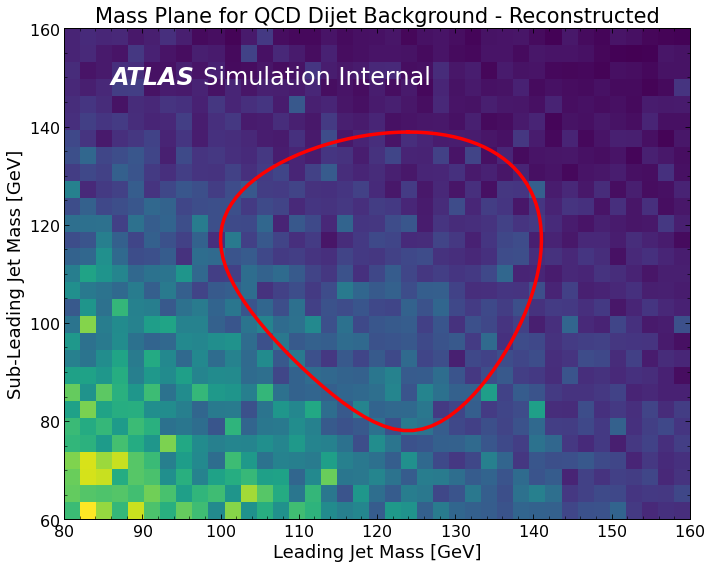

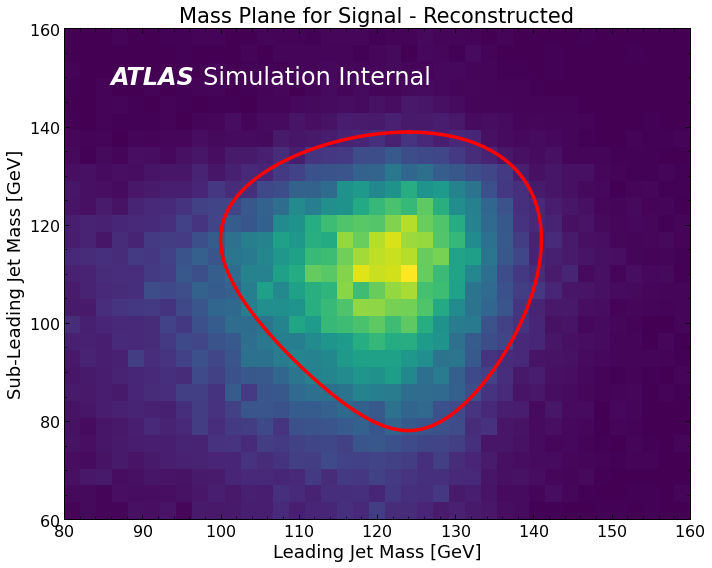

In [35]:
#==========================================================
mp_sr_range = [[80, 160], [60, 160]]
mp_bins = [40,30]
xbins_sr = np.linspace(80,160,num=40,endpoint=True)
ybins_sr = np.linspace(60,160,num=30,endpoint=True)
#==========================================================

#=========#
## STATS ##
#=========#

## Background
sr_bkgd_reco_bool = SR_test(mh1=LJM_dijet_reco, mh2=SLJM_dijet_reco)
MC_dijet_SR_reco = MC_dijet[sr_bkgd_reco_bool]
MC_dijet_SR_reco_tot = np.sum(MC_dijet_SR_reco)

## Signal
sr_sig_reco_bool = SR_test(mh1=LJM_sig_reco, mh2=SLJM_sig_reco)
MC_sig_SR_reco = MC_sig[sr_sig_reco_bool]
MC_sig_SR_reco_tot = np.sum(MC_sig_SR_reco)

print('\nSignal: {}'.format(MC_sig_SR_reco_tot))
print('Background: {}'.format(MC_dijet_SR_reco_tot))
print('\ns/sqrt(b): {}\n\n'.format(
    MC_sig_SR_reco_tot/np.sqrt(MC_dijet_SR_reco_tot)))

#============#
## PLOTTING ##
#============#

## BACKGROUND ##
##=========================================================
plt.hist2d(x=LJM_dijet_reco,
            y=SLJM_dijet_reco,
            bins=[xbins_sr, ybins_sr],
            density=False, weights=MC_dijet)
plt.plot(mh1_sr, mh2_sr, color='red', lw=3.5)
plt.xlabel('Leading Jet Mass [GeV]', fontsize=18)
plt.ylabel('Sub-Leading Jet Mass [GeV]', fontsize=18)
plt.title('Mass Plane for QCD Dijet Background - Reconstructed', fontsize=21)
ax_reco = plt.gca()
ampl.plot.draw_atlas_label(x=.075, y=.925, ax=ax_reco, status='int',
                           simulation=True, color='white', fontsize=24)
plt.tight_layout()
fig = plt.gcf()
fig.patch.set_facecolor('white')
fig.patch.set_alpha(1.0)
plt.savefig('Plots/Presentation_Feb23/massplane_qcd_dijet_reco.png')
plt.show()


## SIGNAL ##
##=========================================================
plt.hist2d(x=LJM_sig_reco,
            y=SLJM_sig_reco,
            bins=[xbins_sr, ybins_sr],
            density=False, weights=MC_sig)
plt.plot(mh1_sr, mh2_sr, color='red', lw=3.5)
plt.xlabel('Leading Jet Mass [GeV]', fontsize=18)
plt.ylabel('Sub-Leading Jet Mass [GeV]', fontsize=18)
plt.title('Mass Plane for Signal - Reconstructed', fontsize=21)
ax_reco = plt.gca()
ampl.plot.draw_atlas_label(x=.075, y=.925, ax=ax_reco, status='int',
                           simulation=True, color='white', fontsize=24)
plt.tight_layout()
fig = plt.gcf()
fig.patch.set_facecolor('white')
fig.patch.set_alpha(1.0)
plt.savefig('Plots/Presentation_Feb23/massplane_signal_reco.png')
plt.show()

## Regressed Mass Plane

### Background and Signal


Signal: 0.01678798533976078
Background: 28922.261444670195

s/sqrt(b): 9.871484262170633e-05




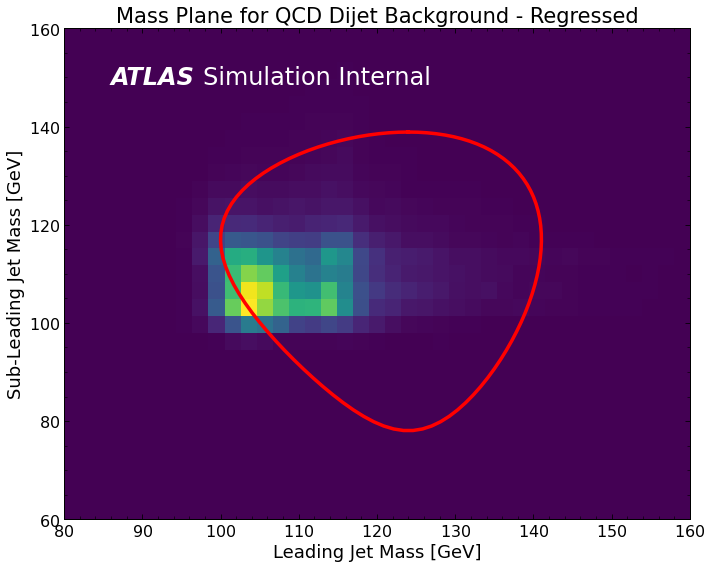

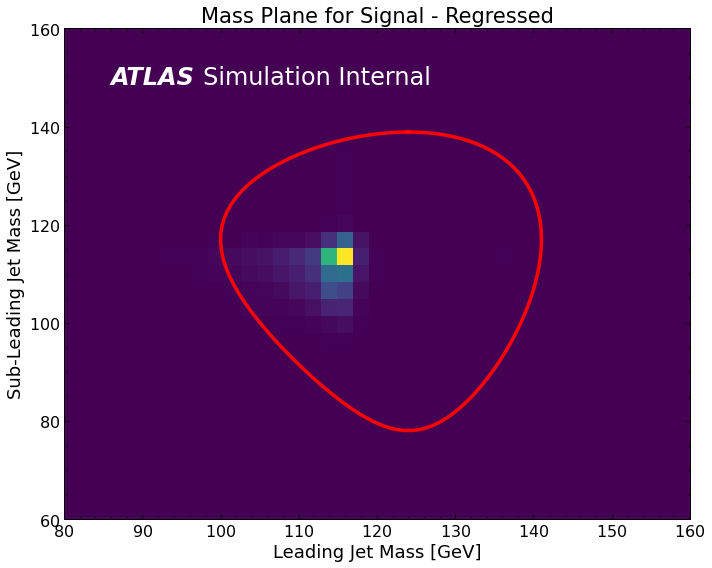

In [36]:
#==========================================================
xbins_sr = np.linspace(80,160,num=40,endpoint=True)
ybins_sr = np.linspace(60,160,num=30,endpoint=True)
#==========================================================

#=========#
## STATS ##
#=========#

## Background
sr_bkgd_nn_bool = SR_test(mh1=LJM_dijet_nn, mh2=SLJM_dijet_nn)
MC_dijet_SR_nn = MC_dijet_ev[sr_bkgd_nn_bool]
MC_dijet_SR_nn_tot = np.sum(MC_dijet_SR_nn)

## Signal
sr_sig_nn_bool = SR_test(mh1=LJM_sig_nn, mh2=SLJM_sig_nn)
MC_sig_SR_nn = MC_sig_test[sr_sig_nn_bool]
MC_sig_SR_nn_tot = np.sum(MC_sig_SR_nn)

print('\nSignal: {}'.format(MC_sig_SR_nn_tot))
print('Background: {}'.format(MC_dijet_SR_nn_tot))
print('\ns/sqrt(b): {}\n\n'.format(
    MC_sig_SR_nn_tot/np.sqrt(MC_dijet_SR_nn_tot)))

#============#
## PLOTTING ##
#============#

## BACKGROUND ##
##=========================================================
plt.hist2d(x=LJM_dijet_nn,
            y=SLJM_dijet_nn,
            bins=[xbins_sr, ybins_sr],
            density=False, weights=MC_dijet_ev)
plt.plot(mh1_sr, mh2_sr, color='red', lw=3.5)
plt.xlabel('Leading Jet Mass [GeV]', fontsize=18)
plt.ylabel('Sub-Leading Jet Mass [GeV]', fontsize=18)
plt.title('Mass Plane for QCD Dijet Background - Regressed', fontsize=21)
ax_reco = plt.gca()
ampl.plot.draw_atlas_label(x=.075, y=.925, ax=ax_reco, status='int',
                           simulation=True, color='white', fontsize=24)
plt.tight_layout()
fig = plt.gcf()
fig.patch.set_facecolor('white')
fig.patch.set_alpha(1.0)
plt.savefig('Plots/Presentation_Feb23/massplane_qcd_dijet_nn.png')
plt.show()


## SIGNAL ##
##=========================================================
plt.hist2d(x=LJM_sig_nn,
            y=SLJM_sig_nn,
            bins=[xbins_sr, ybins_sr],
            density=False, weights=MC_sig_test)
plt.plot(mh1_sr, mh2_sr, color='red', lw=3.5)
plt.xlabel('Leading Jet Mass [GeV]', fontsize=18)
plt.ylabel('Sub-Leading Jet Mass [GeV]', fontsize=18)
plt.title('Mass Plane for Signal - Regressed', fontsize=21)
ax_reco = plt.gca()
ampl.plot.draw_atlas_label(x=.075, y=.925, ax=ax_reco, status='int',
                           simulation=True, color='white', fontsize=24)
plt.tight_layout()
fig = plt.gcf()
fig.patch.set_facecolor('white')
fig.patch.set_alpha(1.0)
plt.savefig('Plots/Presentation_Feb23/massplane_signal_nn.png')
plt.show()

#### Obviously we need to play with the signal region a little bit!

In [30]:
# Number 1
mh1_sr1 = mt_SR_broken(f_t=np.sin, a=124, b=1500, c=1.6)
mh2_sr1 = mt_SR_broken(f_t=np.cos, a=117, b=1900, c=1.6)

# Number 2
mh1_sr2 = mt_SR_broken(f_t=np.sin, a=124, b=1500, c=1.0)
mh2_sr2 = mt_SR_broken(f_t=np.cos, a=117, b=1900, c=1.0)

# Number 3
mh1_sr3 = mt_SR_broken(f_t=np.sin, a=124, b=1100, c=1.6)
mh2_sr3 = mt_SR_broken(f_t=np.cos, a=117, b=1500, c=1.6)

# Number 4
mh1_sr4 = mt_SR_broken(f_t=np.sin, a=124, b=1900, c=1.6)
mh2_sr4 = mt_SR_broken(f_t=np.cos, a=117, b=2300, c=1.6)

# # Number 5
# mh1_sr5 = mt_SR_broken(f_t=np.sin, a=124, b=1500, c=1.6)
# mh2_sr5 = mt_SR_broken(f_t=np.cos, a=117, b=1900, c=1.6)

/tmp/ipykernel_28243/2520882646.py:6: RuntimeWarning: invalid value encountered in sqrt
  SQRT = np.sqrt(a**2 + 4*b*c*param)


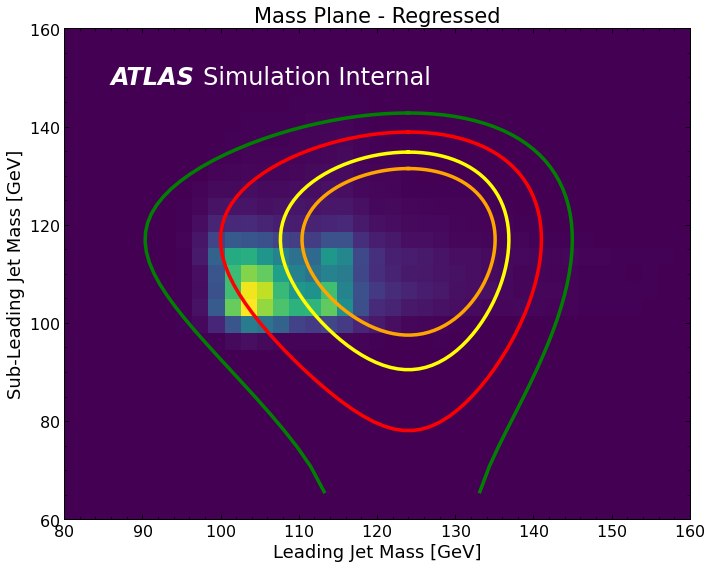

In [31]:
xbins_sr = np.linspace(80,160,num=40,endpoint=True)
ybins_sr = np.linspace(60,160,num=30,endpoint=True)
#==========================================================

plt.hist2d(x=LJM_dijet_nn,
            y=SLJM_dijet_nn,
            bins=[xbins_sr, ybins_sr],
            density=False, weights=MC_dijet_ev)
plt.plot(mh1_sr1, mh2_sr1, color='red', lw=3.5)
plt.plot(mh1_sr2, mh2_sr2, color='orange', lw=3.5)
plt.plot(mh1_sr3, mh2_sr3, color='yellow', lw=3.5)
plt.plot(mh1_sr4, mh2_sr4, color='green', lw=3.5)
plt.xlabel('Leading Jet Mass [GeV]', fontsize=18)
plt.ylabel('Sub-Leading Jet Mass [GeV]', fontsize=18)
plt.title('Mass Plane - Regressed', fontsize=21)
ax_reco = plt.gca()
ampl.plot.draw_atlas_label(x=.075, y=.925, ax=ax_reco, status='int',
                           simulation=True, color='white', fontsize=24)
plt.tight_layout()
fig = plt.gcf()
fig.patch.set_facecolor('white')
fig.patch.set_alpha(1.0)
# plt.savefig('Plots/Presentation_Feb23/massplane_qcd_dijet_nn_experiment_with_SR.png')
plt.show()

### Testing Simple s/b

In [37]:
var_combos1 = {
    'red' : (124, 1500, 117, 1900, 1.6),
    'yellow' : (124, 1100, 117, 1500, 1.6),
    'orange' : (124, 1500, 117, 1900, 1.0),
    'cyan' : (124, 1100, 117, 1500, 1.0)
}
var_combos2 = {
    'magenta' : (115, 900, 112, 1300, 1.6),
    'lime' : (115, 700, 112, 1100, 1.6),
    'white' : (115, 600, 112, 900, 1.6),
    'hotpink' : (115, 400, 112, 700, 1.0)
}
color_results1 = dict()
color_results2 = dict()

for i, (color, (_a, _b, _c, _d, _e)) in enumerate(var_combos1.items()):
    
    print('\nCalculating {}: {}'.format(i, color))
    
    ## Background
    sr_bkgd_nn_bool_i = SR_test(mh1=LJM_dijet_nn, mh2=SLJM_dijet_nn,
                                a=_a, b=_b, c=_c, d=_d, e=_e)
    MC_dijet_SR_nn_i = MC_dijet_ev[sr_bkgd_nn_bool_i]
    MC_dijet_SR_nn_tot_i = np.sum(MC_dijet_SR_nn_i)

    ## Signal
    sr_sig_nn_bool_i = SR_test(mh1=LJM_sig_nn, mh2=SLJM_sig_nn,
                             a=_a, b=_b, c=_c, d=_d, e=_e)
    MC_sig_SR_nn_i = MC_sig_test[sr_sig_nn_bool_i]
    MC_sig_SR_nn_tot_i = np.sum(MC_sig_SR_nn_i)
    
    ## S/B
    s_ov_b = MC_sig_SR_nn_tot_i / np.sqrt(MC_dijet_SR_nn_tot_i)
    
    ## Calculate Lines (parametrized by x of t or y of t)
    x_of_t_i = mt_SR_broken(f_t=np.sin, a=_a, b=_b, c=_e)
    y_of_t_i = mt_SR_broken(f_t=np.cos, a=_c, b=_d, c=_e)
    
    ## Save Results
    color_results1[color] = dict()
    color_results1[color]['s_ov_b'] = s_ov_b
    color_results1[color]['x_t'] = x_of_t_i
    color_results1[color]['y_t'] = y_of_t_i
    
    print('signal/sqrt(b): {}'.format(s_ov_b))
    
print('\nSecond set..'); print('-'*40)
for i, (color, (_a, _b, _c, _d, _e)) in enumerate(var_combos2.items()):
    
    print('\nCalculating {}: {}'.format(i, color))
    
    ## Background
    sr_bkgd_nn_bool_i = SR_test(mh1=LJM_dijet_nn, mh2=SLJM_dijet_nn,
                                a=_a, b=_b, c=_c, d=_d, e=_e)
    MC_dijet_SR_nn_i = MC_dijet_ev[sr_bkgd_nn_bool_i]
    MC_dijet_SR_nn_tot_i = np.sum(MC_dijet_SR_nn_i)

    ## Signal
    sr_sig_nn_bool_i = SR_test(mh1=LJM_sig_nn, mh2=SLJM_sig_nn,
                             a=_a, b=_b, c=_c, d=_d, e=_e)
    MC_sig_SR_nn_i = MC_sig_test[sr_sig_nn_bool_i]
    MC_sig_SR_nn_tot_i = np.sum(MC_sig_SR_nn_i)
    
    ## S/B
    s_ov_b = MC_sig_SR_nn_tot_i / np.sqrt(MC_dijet_SR_nn_tot_i)
    
    ## Calculate Lines (parametrized by x of t or y of t)
    x_of_t_i = mt_SR_broken(f_t=np.sin, a=_a, b=_b, c=_e)
    y_of_t_i = mt_SR_broken(f_t=np.cos, a=_c, b=_d, c=_e)
    
    ## Save Results
    color_results2[color] = dict()
    color_results2[color]['s_ov_b'] = s_ov_b
    color_results2[color]['x_t'] = x_of_t_i
    color_results2[color]['y_t'] = y_of_t_i
    
    print('signal/sqrt(b): {}'.format(s_ov_b))


Calculating 0: red
signal/sqrt(b): 9.871484262170633e-05

Calculating 1: yellow
signal/sqrt(b): 0.0001260613863779221

Calculating 2: orange
signal/sqrt(b): 0.00013161576326741172

Calculating 3: cyan
signal/sqrt(b): 9.080495207627582e-05

Second set..
----------------------------------------

Calculating 0: magenta
signal/sqrt(b): 9.977224685978391e-05

Calculating 1: lime
signal/sqrt(b): 0.0001152242669298392

Calculating 2: white
signal/sqrt(b): 0.0001267740075370315

Calculating 3: hotpink
signal/sqrt(b): 0.0001803094246427005


### Investigate Results with Different Signal Regions

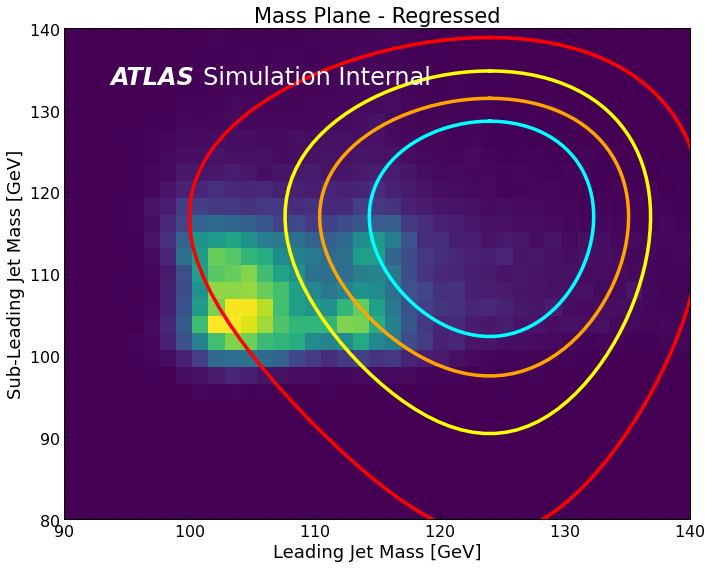

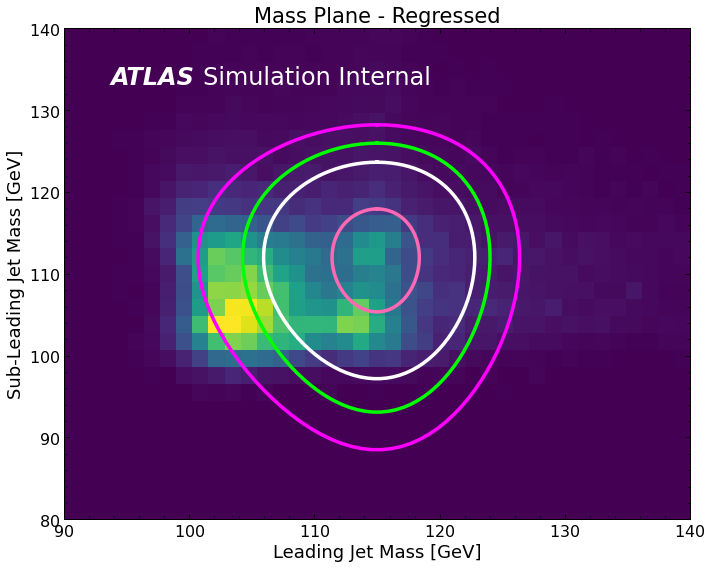

In [33]:
xbins_sr_zoom = np.linspace(90,140,num=40,endpoint=True)
ybins_sr_zoom = np.linspace(80,140,num=30,endpoint=True)
#==========================================================

plt.hist2d(x=LJM_dijet_nn,
            y=SLJM_dijet_nn,
            bins=[xbins_sr_zoom, ybins_sr_zoom],
            density=False, weights=MC_dijet_ev)
for color in color_results1.keys():
    res_dict = color_results1[color]
    xt = res_dict['x_t']
    yt = res_dict['y_t']
    plt.plot(xt, yt, color=color, lw=3.5)
plt.xlabel('Leading Jet Mass [GeV]', fontsize=18)
plt.ylabel('Sub-Leading Jet Mass [GeV]', fontsize=18)
plt.title('Mass Plane - Regressed', fontsize=21)
ax_reco = plt.gca()
ampl.plot.draw_atlas_label(x=.075, y=.925, ax=ax_reco, status='int',
                           simulation=True, color='white', fontsize=24)
plt.tight_layout()
fig = plt.gcf()
fig.patch.set_facecolor('white')
fig.patch.set_alpha(1.0)
# plt.savefig('Plots/Presentation_Feb23/massplane_qcd_dijet_nn_experiment_SovB.png')
plt.show()

#==========================================================================
plt.hist2d(x=LJM_dijet_nn,
            y=SLJM_dijet_nn,
            bins=[xbins_sr_zoom, ybins_sr_zoom],
            density=False, weights=MC_dijet_ev)
for color in color_results2.keys():
    res_dict = color_results2[color]
    xt = res_dict['x_t']
    yt = res_dict['y_t']
    plt.plot(xt, yt, color=color, lw=3.5)
plt.xlabel('Leading Jet Mass [GeV]', fontsize=18)
plt.ylabel('Sub-Leading Jet Mass [GeV]', fontsize=18)
plt.title('Mass Plane - Regressed', fontsize=21)
ax_reco = plt.gca()
ampl.plot.draw_atlas_label(x=.075, y=.925, ax=ax_reco, status='int',
                           simulation=True, color='white', fontsize=24)
plt.tight_layout()
fig = plt.gcf()
fig.patch.set_facecolor('white')
fig.patch.set_alpha(1.0)
# plt.savefig('Plots/Presentation_Feb23/massplane_qcd_dijet_nn_experiment_with_SovB.png')
plt.show()

In [34]:
for key in matplotlib.rcParams.keys():
    print(key)

_internal.classic_mode
agg.path.chunksize
animation.bitrate
animation.codec
animation.convert_args
animation.convert_path
animation.embed_limit
animation.ffmpeg_args
animation.ffmpeg_path
animation.frame_format
animation.html
animation.writer
axes.autolimit_mode
axes.axisbelow
axes.edgecolor
axes.facecolor
axes.formatter.limits
axes.formatter.min_exponent
axes.formatter.offset_threshold
axes.formatter.use_locale
axes.formatter.use_mathtext
axes.formatter.useoffset
axes.grid
axes.grid.axis
axes.grid.which
axes.labelcolor
axes.labelpad
axes.labelsize
axes.labelweight
axes.linewidth
axes.prop_cycle
axes.spines.bottom
axes.spines.left
axes.spines.right
axes.spines.top
axes.titlecolor
axes.titlelocation
axes.titlepad
axes.titlesize
axes.titleweight
axes.titley
axes.unicode_minus
axes.xmargin
axes.ymargin
axes.zmargin
axes3d.grid
backend
backend_fallback
boxplot.bootstrap
boxplot.boxprops.color
boxplot.boxprops.linestyle
boxplot.boxprops.linewidth
boxplot.capprops.color
boxplot.capprops.line